# Exam Project Anissa, Anna, Lilo

### Welcome to our project with music label Harmonic Beats.
Welcome to our project with music label Harmonic Beats. Led by Toby, Harmonic Beats has tasked our team with developing a model that can automatically classify audio tracks into genres based on various musical attributes. By automating this process, we hope to help Harmonic Beats offer their users an effortless way to explore and discover music that aligns with their taste more accurately. 
In Milestone 1 of this project, we conducted an extensive Exploratory Data Analysis in which we took a closer look at the distribution of samples per genre as well as the distribution of each individual feature to help us identify relationships and attributes that are most significant for developing an accurate model. 
Below we will show an overview of the data and summary of the most important parts previously conducted.  


In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data set
songs_data = pd.read_csv("../data/songs_data.csv")

## Data Overview and summary of EDA

In [3]:
# Here we generate an overview to get familiar with the data
# Summary of Exploratory Data Analysis as conducted in Milestone 1 of the exam project 

In [4]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32833 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32833 non-null  int64  
 4   playlist_name     32833 non-null  object 
 5   playlist_id       32833 non-null  object 
 6   genre             32833 non-null  object 
 7   danceability      32833 non-null  float64
 8   energy            32833 non-null  float64
 9   key               32833 non-null  int64  
 10  loudness          32833 non-null  float64
 11  mode              32833 non-null  int64  
 12  speechiness       32833 non-null  float64
 13  acousticness      32833 non-null  float64
 14  instrumentalness  32833 non-null  float64
 15  liveness          32833 non-null  float64
 16  valence           32833 non-null  float6

In [5]:
songs_data.shape

(32833, 19)

In [6]:
songs_data.genre.value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

### Breakdown into Gernres

In [7]:
# For visualization purposes

In [8]:
rock_data = songs_data[songs_data.genre == "rock"]

In [9]:
pop_data = songs_data[songs_data.genre == "pop"]

In [10]:
rap_data = songs_data[songs_data.genre == "rap"]

In [11]:
latin_data = songs_data[songs_data.genre == "latin"]

In [12]:
rnb_data = songs_data[songs_data.genre == "r&b"]

In [13]:
edm_data = songs_data[songs_data.genre == "edm"]

## 1. Data Cleaning

After having explored the data, the second step to building a successful model is to remove missing values and redundant data. This will help ensure that the classification will be more accurate and not skew the results.


### Check for any Missing Data

In [14]:
# As part of the data cleaning we will check for any missing values in our dataset

In [15]:
songs_data.isnull().sum()

track_id            0
track_name          5
track_artist        5
track_popularity    0
playlist_name       0
playlist_id         0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [16]:
# We realize there are five values missing in columns "track_name" and "track_artisit"
# Since these values fall under categories that we define as non-essential for genre classification (see below) there is no need to drop them yet


### Check for Duplicates

In [17]:
# Removing redundant data

In [18]:
songs_data.duplicated().sum()

323

In [19]:
print(songs_data.shape)
songs_data_cleaned = songs_data.drop_duplicates()
print(songs_data_cleaned.shape)

(32833, 19)
(32510, 19)


### Identifying Irrelevant Features

By retaining only essential features, we allow the model to focus on characteristics we define as essential to genre classification. In our presentation we were unsure if some of the features would be necessary for our machine learning model. These include track_artist, playlist_name, track_popularity and duration_ms. To determine if we would use them or drop them we experimented with the accuracy and precision with and without the features and got a better accuracy and precision when we included the playlist_name, track_popularity and durantion_ms.
Furthermore we dropped the key feature because the difference between genres was minimal.

In [20]:
# To decide if we were to keep the duration we visualized it within the different genres to find correlations
# We thought that it could be quite useful for genre classification 
# Because certain genres tend to have typical song lengths (e.g. rock songs are typically longer than pop songs)
# Differences are not huge but still significant so we decided to keep duration_ms in our model

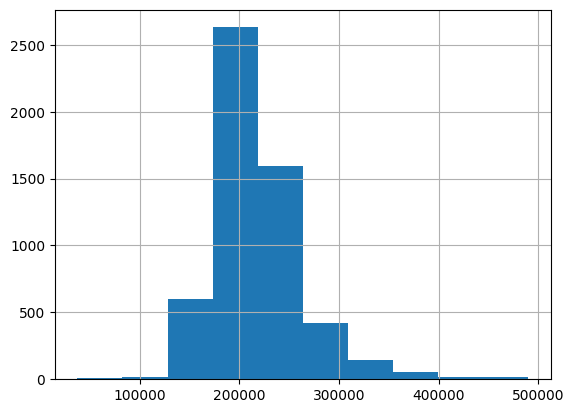

In [21]:
pop_data.duration_ms.hist();

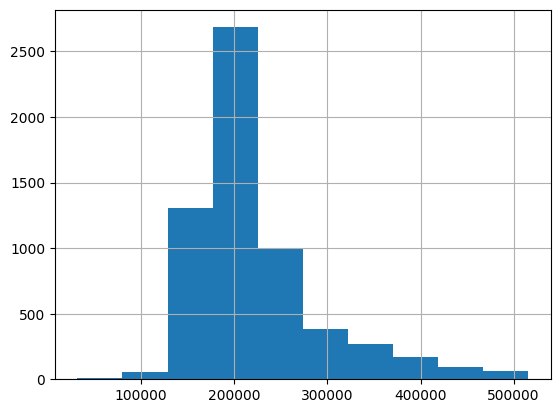

In [22]:
edm_data.duration_ms.hist();

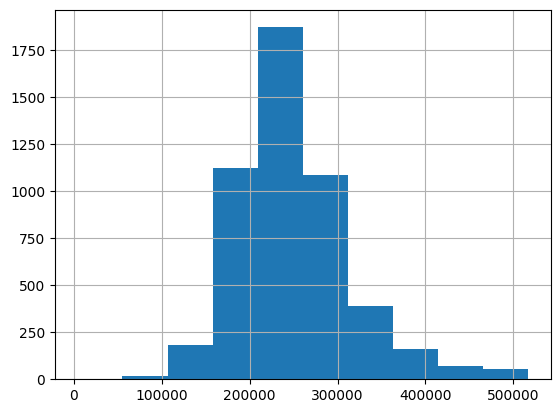

In [23]:
rock_data.duration_ms.hist();

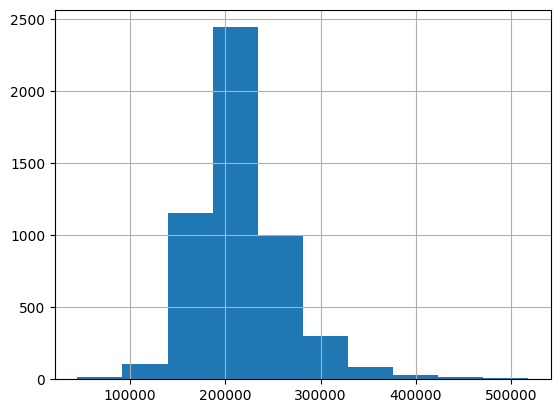

In [24]:
latin_data.duration_ms.hist();

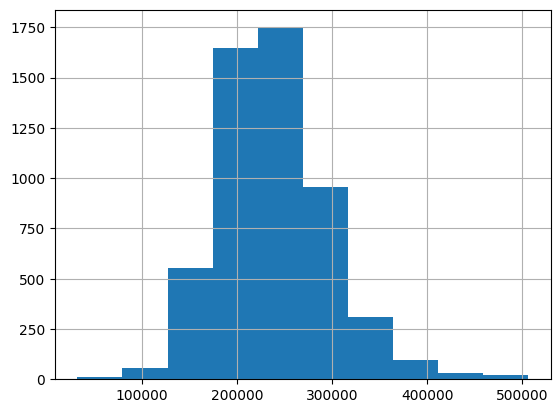

In [25]:
rnb_data.duration_ms.hist();

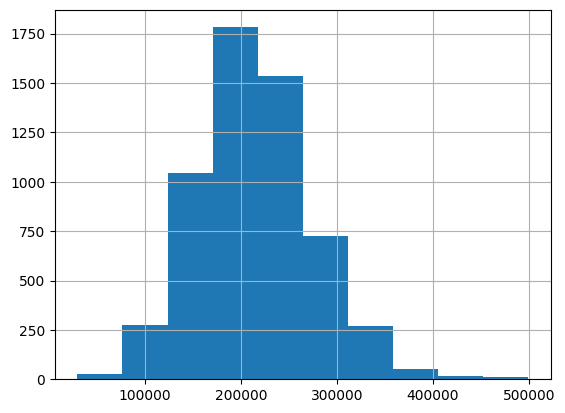

In [26]:
rap_data.duration_ms.hist();

### Dropping non-essential features

After eploring the data, we decided to drop track_name, track_id, track_artist and playlist_id as they only provide non-essential data. Mode and Key did also not prove to deliver important insights, as their values were not varied enough make telling distinctions between genres.

In [27]:
# Drop the unnecessary columns
songs_data_cleaned = songs_data.drop(columns=['track_name', 'track_id', 'track_artist',  'playlist_id','mode','key'])

In [28]:
songs_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32833 non-null  int64  
 1   playlist_name     32833 non-null  object 
 2   genre             32833 non-null  object 
 3   danceability      32833 non-null  float64
 4   energy            32833 non-null  float64
 5   loudness          32833 non-null  float64
 6   speechiness       32833 non-null  float64
 7   acousticness      32833 non-null  float64
 8   instrumentalness  32833 non-null  float64
 9   liveness          32833 non-null  float64
 10  valence           32833 non-null  float64
 11  tempo             32833 non-null  float64
 12  duration_ms       32833 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 3.3+ MB


In [29]:
print(songs_data_cleaned.shape)

(32833, 13)


## Remove Outliers

We removed outliers to improve the model’s accuracy by focusing on typical values across genres.

In [30]:
# Check every characteristc for outliers and remove them

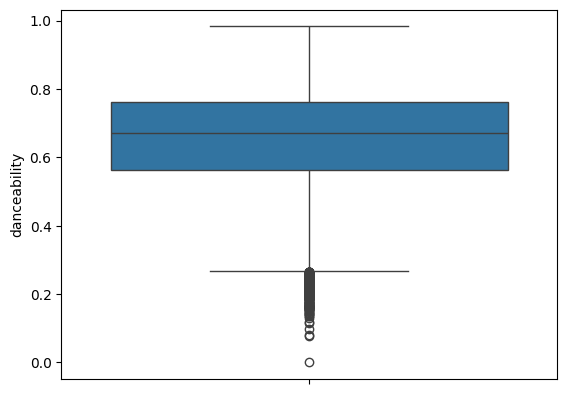

In [31]:
# Danceability
sns.boxplot(y=songs_data_cleaned.danceability);

In [32]:
# Remove the outliers
# Reference: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['danceability'] > 0.28]

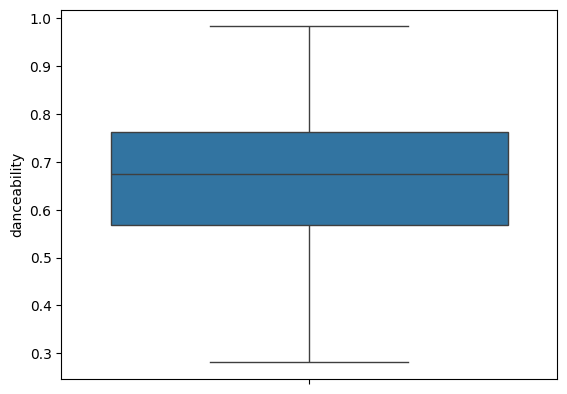

In [33]:
sns.boxplot(y=songs_data_cleaned.danceability);

In [34]:
print(songs_data_cleaned.shape)

(32436, 13)


In [35]:
# Repeat for the other categories

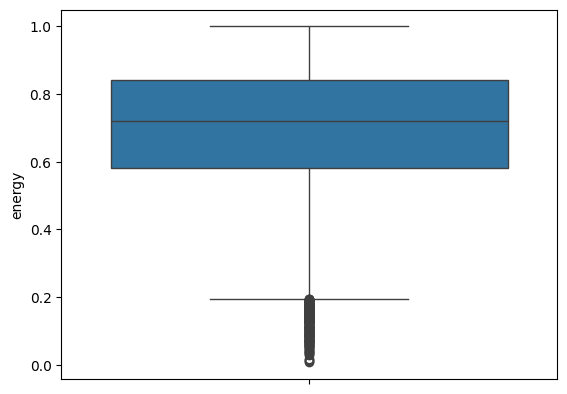

In [36]:
sns.boxplot(y=songs_data_cleaned.energy);

In [37]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['energy'] > 0.21]

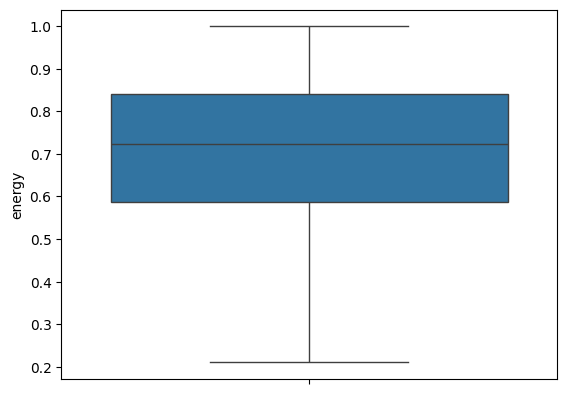

In [38]:
sns.boxplot(y=songs_data_cleaned.energy);

In [39]:
print(songs_data_cleaned.shape)

(32111, 13)


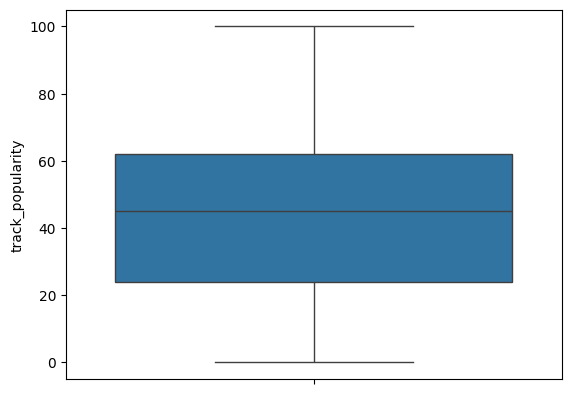

In [40]:
sns.boxplot(y=songs_data_cleaned.track_popularity);

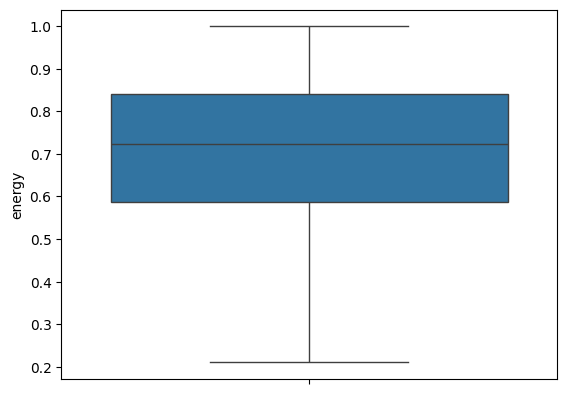

In [41]:
sns.boxplot(y=songs_data_cleaned.energy);

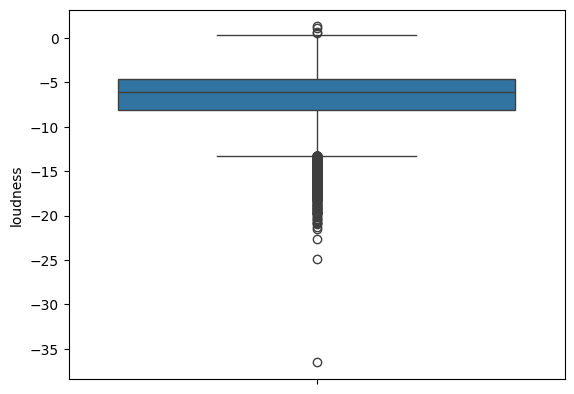

In [42]:
sns.boxplot(y=songs_data_cleaned.loudness);

In [43]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['loudness'] > -12.5]
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['loudness'] < 0]

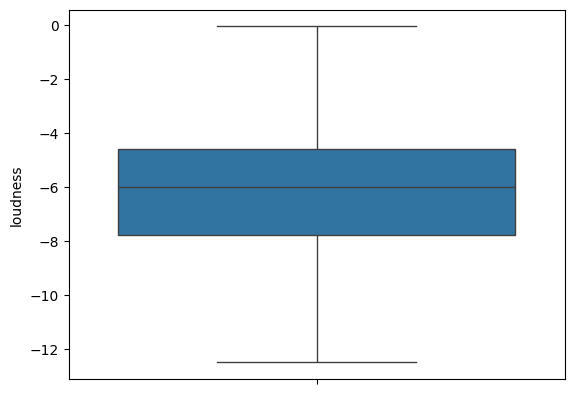

In [44]:
sns.boxplot(y=songs_data_cleaned.loudness);

In [45]:
print(songs_data_cleaned.shape)

(30785, 13)


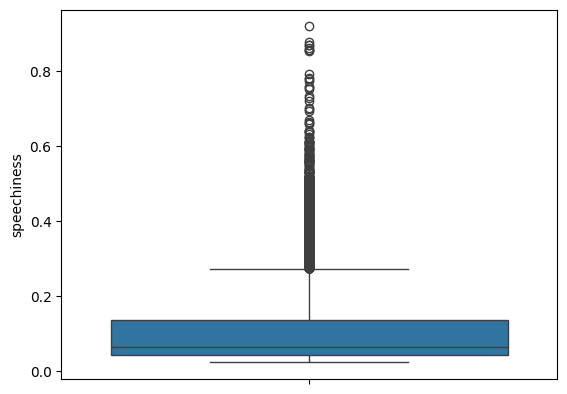

In [46]:
sns.boxplot(y=songs_data_cleaned.speechiness);

In [47]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['speechiness'] < 0.25]

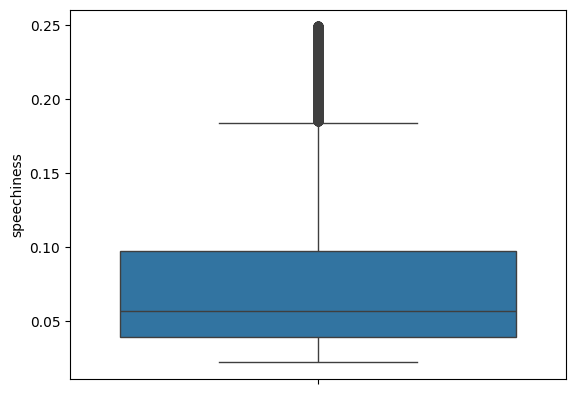

In [48]:
sns.boxplot(y=songs_data_cleaned.speechiness);

In [49]:
print(songs_data_cleaned.shape)

(27253, 13)


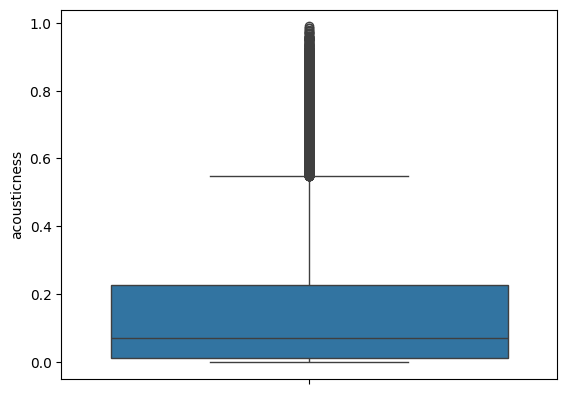

In [50]:
sns.boxplot(y=songs_data_cleaned.acousticness);

In [51]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['acousticness'] < 0.5]

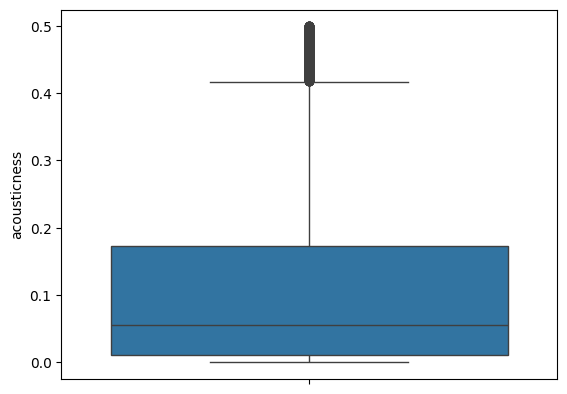

In [52]:
sns.boxplot(y=songs_data_cleaned.acousticness);

In [53]:
print(songs_data_cleaned.shape)

(24887, 13)


In [54]:
# Getting rid of instrumentalness and liveness outliers would mean losing too much data

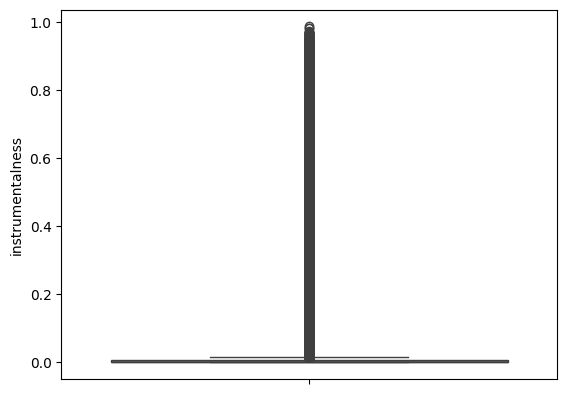

In [55]:
sns.boxplot(y=songs_data_cleaned.instrumentalness);

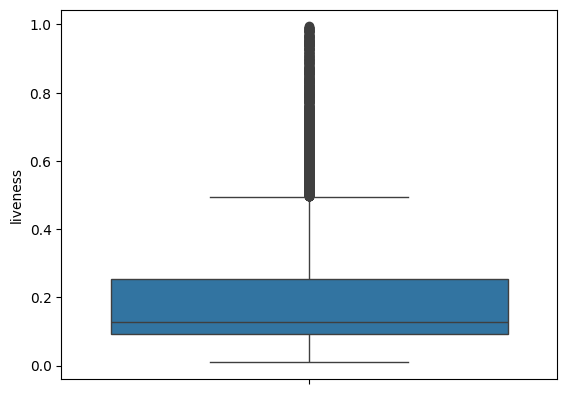

In [56]:
sns.boxplot(y=songs_data_cleaned.liveness);

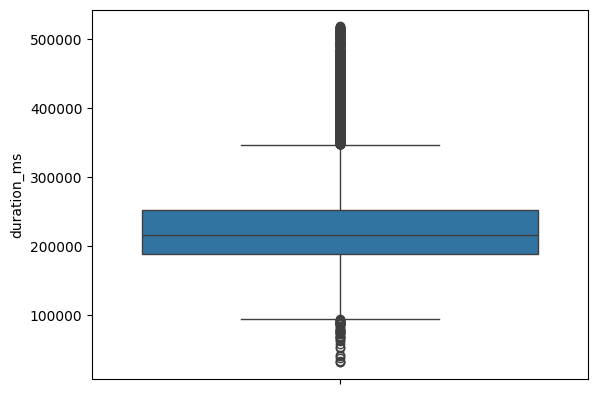

In [57]:
sns.boxplot(y=songs_data_cleaned.duration_ms);

In [58]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['duration_ms'] > 110000]
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['duration_ms'] < 300000]

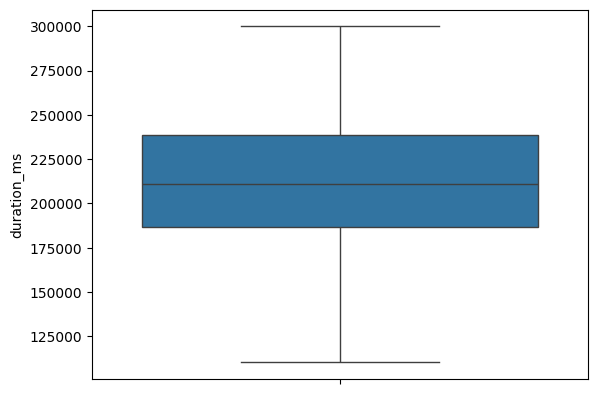

In [59]:
sns.boxplot(y=songs_data_cleaned.duration_ms);

In [60]:
print(songs_data_cleaned.shape)

(22384, 13)


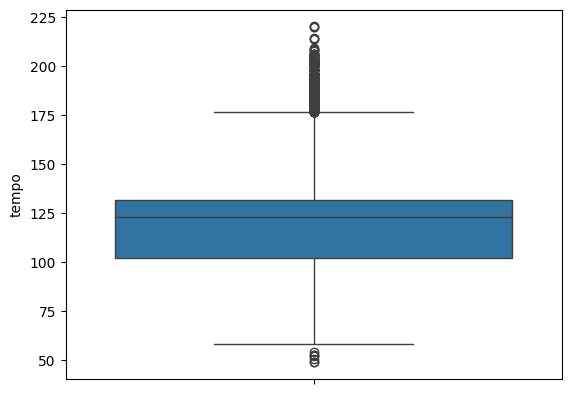

In [61]:
sns.boxplot(y=songs_data_cleaned.tempo);

In [62]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['tempo'] > 70]
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['tempo'] < 160]

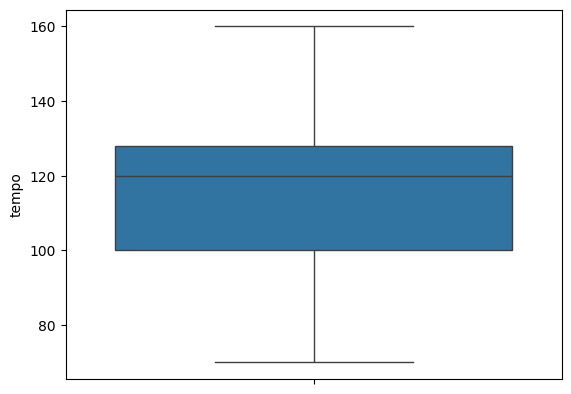

In [63]:
sns.boxplot(y=songs_data_cleaned.tempo);

In [64]:
print(songs_data_cleaned.shape)

(20456, 13)


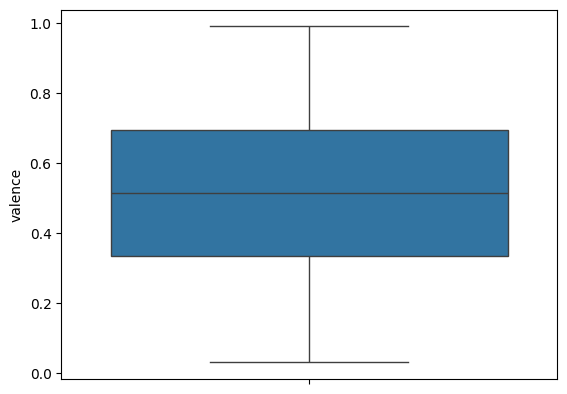

In [65]:
sns.boxplot(y=songs_data_cleaned.valence);

In [66]:
print(songs_data_cleaned.shape)

(20456, 13)


In [67]:
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,Pop Remix,pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,Pop Remix,pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,Pop Remix,pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,Pop Remix,pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,Pop Remix,pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# 2. Feature Engineering

## Label Encoding

In [68]:
# First thing we do in feature engineering is that we need to transform the object types into numbers by using label encoding

In [69]:
songs_data_cleaned['genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [70]:
# Encode the labels

from sklearn import preprocessing 
 
genre_encoded = preprocessing.LabelEncoder() 

# Encode the 'genre' column using the label encoder
songs_data_cleaned['genre']= genre_encoded.fit_transform(songs_data_cleaned['genre']) 
  
songs_data_cleaned['genre'].unique() 

# Reference: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

array([2, 4, 5, 1, 3, 0])

In [71]:
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,Pop Remix,2,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,Pop Remix,2,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,Pop Remix,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,Pop Remix,2,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,Pop Remix,2,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [72]:
# Label encoding the 'playlist_name' column

playlist_encoded = preprocessing.LabelEncoder()

# Encode the 'playlist_name' column using the label encoder
songs_data_cleaned['playlist_name']= playlist_encoded.fit_transform(songs_data_cleaned['playlist_name'])

songs_data_cleaned['playlist_name'].unique()

songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,292,2,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,292,2,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,292,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,292,2,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,292,2,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Creating New Features to Improve Accuracy 

These are all new features we tried. They did not seem to improve accuracy however. 

In [73]:
#songs_data_cleaned['danceability_energy'] = songs_data_cleaned['danceability'] * songs_data_cleaned['energy']

In [74]:
#songs_data_cleaned['track_popularity_valence'] = songs_data_cleaned['track_popularity'] * songs_data_cleaned['valence']

In [75]:
#songs_data_cleaned['valence_dance'] = songs_data_cleaned['valence'] * songs_data_cleaned['danceability']

In [76]:
#songs_data_cleaned['speechiness_acousticness'] = songs_data_cleaned['speechiness'] * songs_data_cleaned['acousticness']

In [77]:
#songs_data_cleaned['track_popularity_energy'] = songs_data_cleaned['track_popularity'] * songs_data_cleaned['energy']

In [78]:
#songs_data_cleaned['valence_energy'] = songs_data_cleaned['valence'] * songs_data_cleaned['energy']

In [79]:
#songs_data_cleaned['tempo_valence'] = songs_data_cleaned['tempo'] * songs_data_cleaned['valence']

In [80]:
#songs_data_cleaned['loudness_duration'] = songs_data_cleaned['loudness'] * songs_data_cleaned['duration_ms']

In [81]:
#songs_data_cleaned['danceability_energy'] = songs_data_cleaned['danceability'] * songs_data_cleaned['energy']

## Splitting the Data into Training and Test Data Sets

In [82]:
# Define the target and features

features = songs_data_cleaned.drop(['genre' ], axis=1)
target = songs_data_cleaned['genre']

In [83]:
features.head()

,track_popularity,playlist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,292,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,292,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,292,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,292,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,292,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [84]:
features.shape

(20456, 12)

In [85]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre, dtype: int32

In [86]:
target.shape

(20456,)

In [87]:
from sklearn.model_selection import train_test_split

# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.3,
                                                    random_state=8888)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [88]:
X_train.shape

(14319, 12)

In [89]:
X_test.shape

(6137, 12)

# 3. Developing the Machine Learning Model

# XGBoost

In [90]:
# Import the xgboost

from xgboost import XGBClassifier

aal_xgb = XGBClassifier()

In [91]:
# Training the machine learning model

aal_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [92]:
# Predict the labels 

y_pred_xgb = aal_xgb.predict(X_test)

## Evaluating the Model

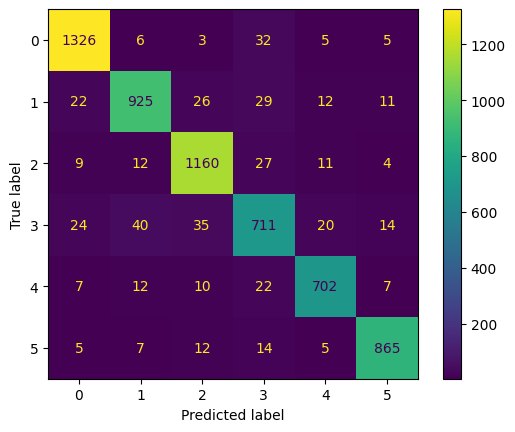

In [93]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=aal_xgb.classes_)

disp.plot();

In [94]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred_xgb, average='weighted')

0.9268065095180491

In [95]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_xgb)

0.9270001629460648

In [96]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred_xgb, average='weighted')

0.9270001629460648

In [97]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_xgb, average='weighted')

0.9268555204210942

In [98]:
# Plot feature importance

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models

       @param model - the trained model
       @param X_train dataframe - the training dataset
       @param n int - the number of features we are interested in plotting
    
    @return a plot with the Top n features
   """

    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                        index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

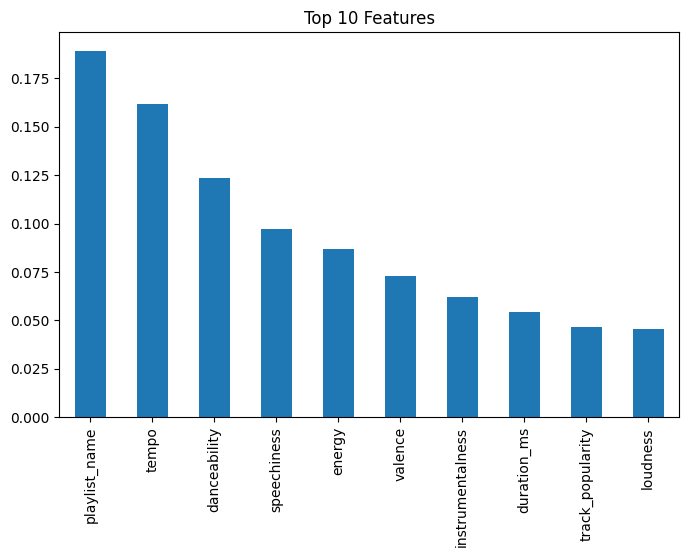

In [99]:
# Visualize the most important features for our model

feature_importance_plot(aal_xgb, X_train, n = 10)

In [100]:
from sklearn.metrics import precision_score
# Calculate precision for each genre
# EDM 
precision_genre_0 = precision_score(y_test, y_pred_xgb, labels=[0], average='weighted')
print(precision_genre_0)
# Latin
precision_genre_1 = precision_score(y_test, y_pred_xgb, labels=[1], average='weighted')
print(precision_genre_1)
# Pop
precision_genre_2 = precision_score(y_test, y_pred_xgb, labels=[2], average='weighted')
print(precision_genre_2)
# R&B
precision_genre_3 = precision_score(y_test, y_pred_xgb, labels=[3], average='weighted')
print(precision_genre_3)
# Rap
precision_genre_4 = precision_score(y_test, y_pred_xgb, labels=[4], average='weighted')
print(precision_genre_4)
# Rock
precision_genre_5 = precision_score(y_test, y_pred_xgb, labels=[5], average='weighted')
print(precision_genre_5)

# Reference: https://www.geeksforgeeks.org/machine-learning-model-evaluation/?ref=gcse_outind

0.951902368987796
0.9231536926147704
0.9309791332263243
0.8514970059880239
0.9298013245033112
0.954746136865342


In [101]:
# Plot the learning curve

from sklearn.model_selection import learning_curve, cross_val_score

def learning_curve_plot(model, X_train, y_train, scoring):
    """Plots learning curves for model validation
    
    @param models - list of models we are interested in evaluating
    @param X_train - the training features
    @param y_train - the target
    
    @returns a plot of the learning curve
    """
    
    plt.figure(figsize=(5, 5)) # set figure size
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        # Number of folds in cross-validation
        cv = 5,
        # Evaluation metric
        scoring = scoring,
        # Use all computer cores
        n_jobs = -1,
        shuffle = True,
        # 5 different sizes of the training set
        train_sizes = np.linspace(0.01, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
    plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

    # Draw bands
    # plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
    # plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc = "best")
    plt.tight_layout()
    

    plt.show()

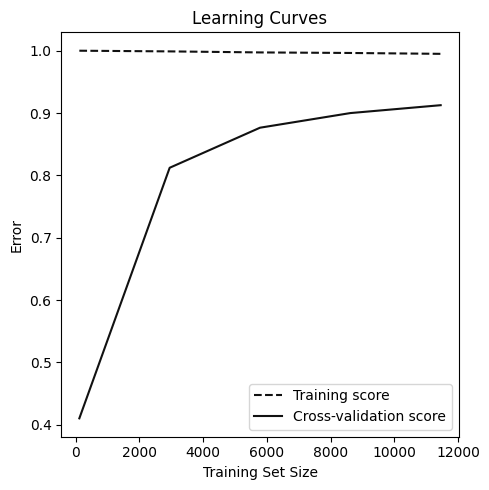

In [102]:
learning_curve_plot(aal_xgb, X_train, y_train, scoring = 'accuracy')

# 4. Evaluation

Overall, we tried many different approaches and combinations of feature engineering to get the best accuracy and precision using the Random Forest Classifier and the XGBoost Classifier, and in the end the XGBoost Classifier gave us the best results. Although the accuracy and precision is not as high as we would have liked, we could not find any more features to change or any more useful feature engineering to make it even better.
However, we did find that the accuracy of certain genres (Latin, Rock, EDM) is better than other genres (Pop and R&B), which could be considered for further work. Evaluating the model, we can see that playlist_name is the most important feature, which could lead to problems if the model is applied to data with very randomly generated playlists, but we think that in most cases playlists have very similar moods and genres, so this will not be a problem. By applying this model to different data, Harmonic Beats can use our model to successfully classify songs into genres.